In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
data = pd.read_csv("insurance.csv")  # Update with your actual filename if needed


In [4]:
print(data.columns)
#we have to change some data (One-Hot-encoding->binary features)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [8]:
data.head()
#as we see we need to change data in : sex-smoker-region

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [13]:
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)
#split_data . we have not much records so we need to split large portion of data for testing

In [14]:
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")
#so we dont use target feature it`s clear why

In [15]:
scaler = StandardScaler()
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)


In [16]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',  # Mean Absolute Error
    metrics=['mae']
)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,  # maximum
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)


C:\Users\ali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)
print(f"Mean Absolute Error: ${mae:.2f}")

9/9 - 0s - 5ms/step - loss: 3006.8979 - mae: 3006.8979
Mean Absolute Error: $3006.90


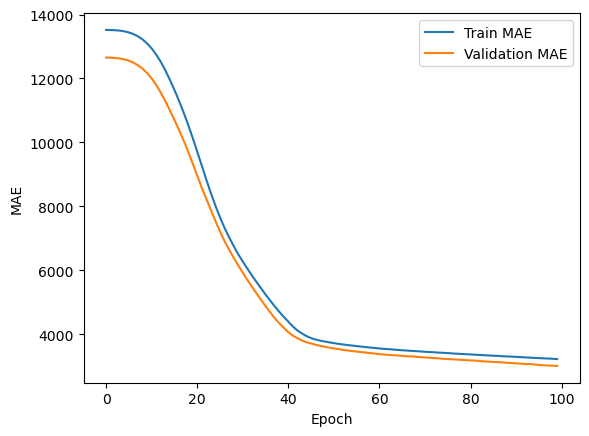

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_dataset, train_labels)
predictions = model.predict(test_dataset)

In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predictions)
print("MAE:", mae)

MAE: 4181.56152400079


In [ ]:
pip install xgboost

In [21]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(train_dataset, train_labels)
predictions = model.predict(test_dataset)

ModuleNotFoundError: No module named 'xgboost'